In [1]:
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
seed_value = 5027
np.random.seed(seed_value)
random.seed(seed_value)

### loading the dataset

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
data = pd.read_csv(url, names=names)

In [3]:
names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']

data=pd.read_csv('processed.cleveland.data', names=names)

In [4]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [5]:
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
data.shape

(303, 14)

In [7]:
data['ca'] = pd.to_numeric(data['ca'], errors='coerce')
data['thal'] = pd.to_numeric(data['thal'], errors='coerce')

In [8]:
data['target'] = data['target'].apply(lambda x: 1 if x > 0 else 0)
target = data['target']

In [9]:
data['ca'] =data['ca'].fillna(data['ca'].mean())
data['thal'] =data['thal'].fillna(data['thal'].mean())

In [10]:
data['target'].unique()

array([0, 1], dtype=int64)

In [11]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219,0.458746
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.931209,1.933272,0.499120
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,1.000000


In [12]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.000000,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.000000,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.000000,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.000000,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.000000,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.000000,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.000000,7.0,1
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.000000,7.0,1
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.000000,3.0,1


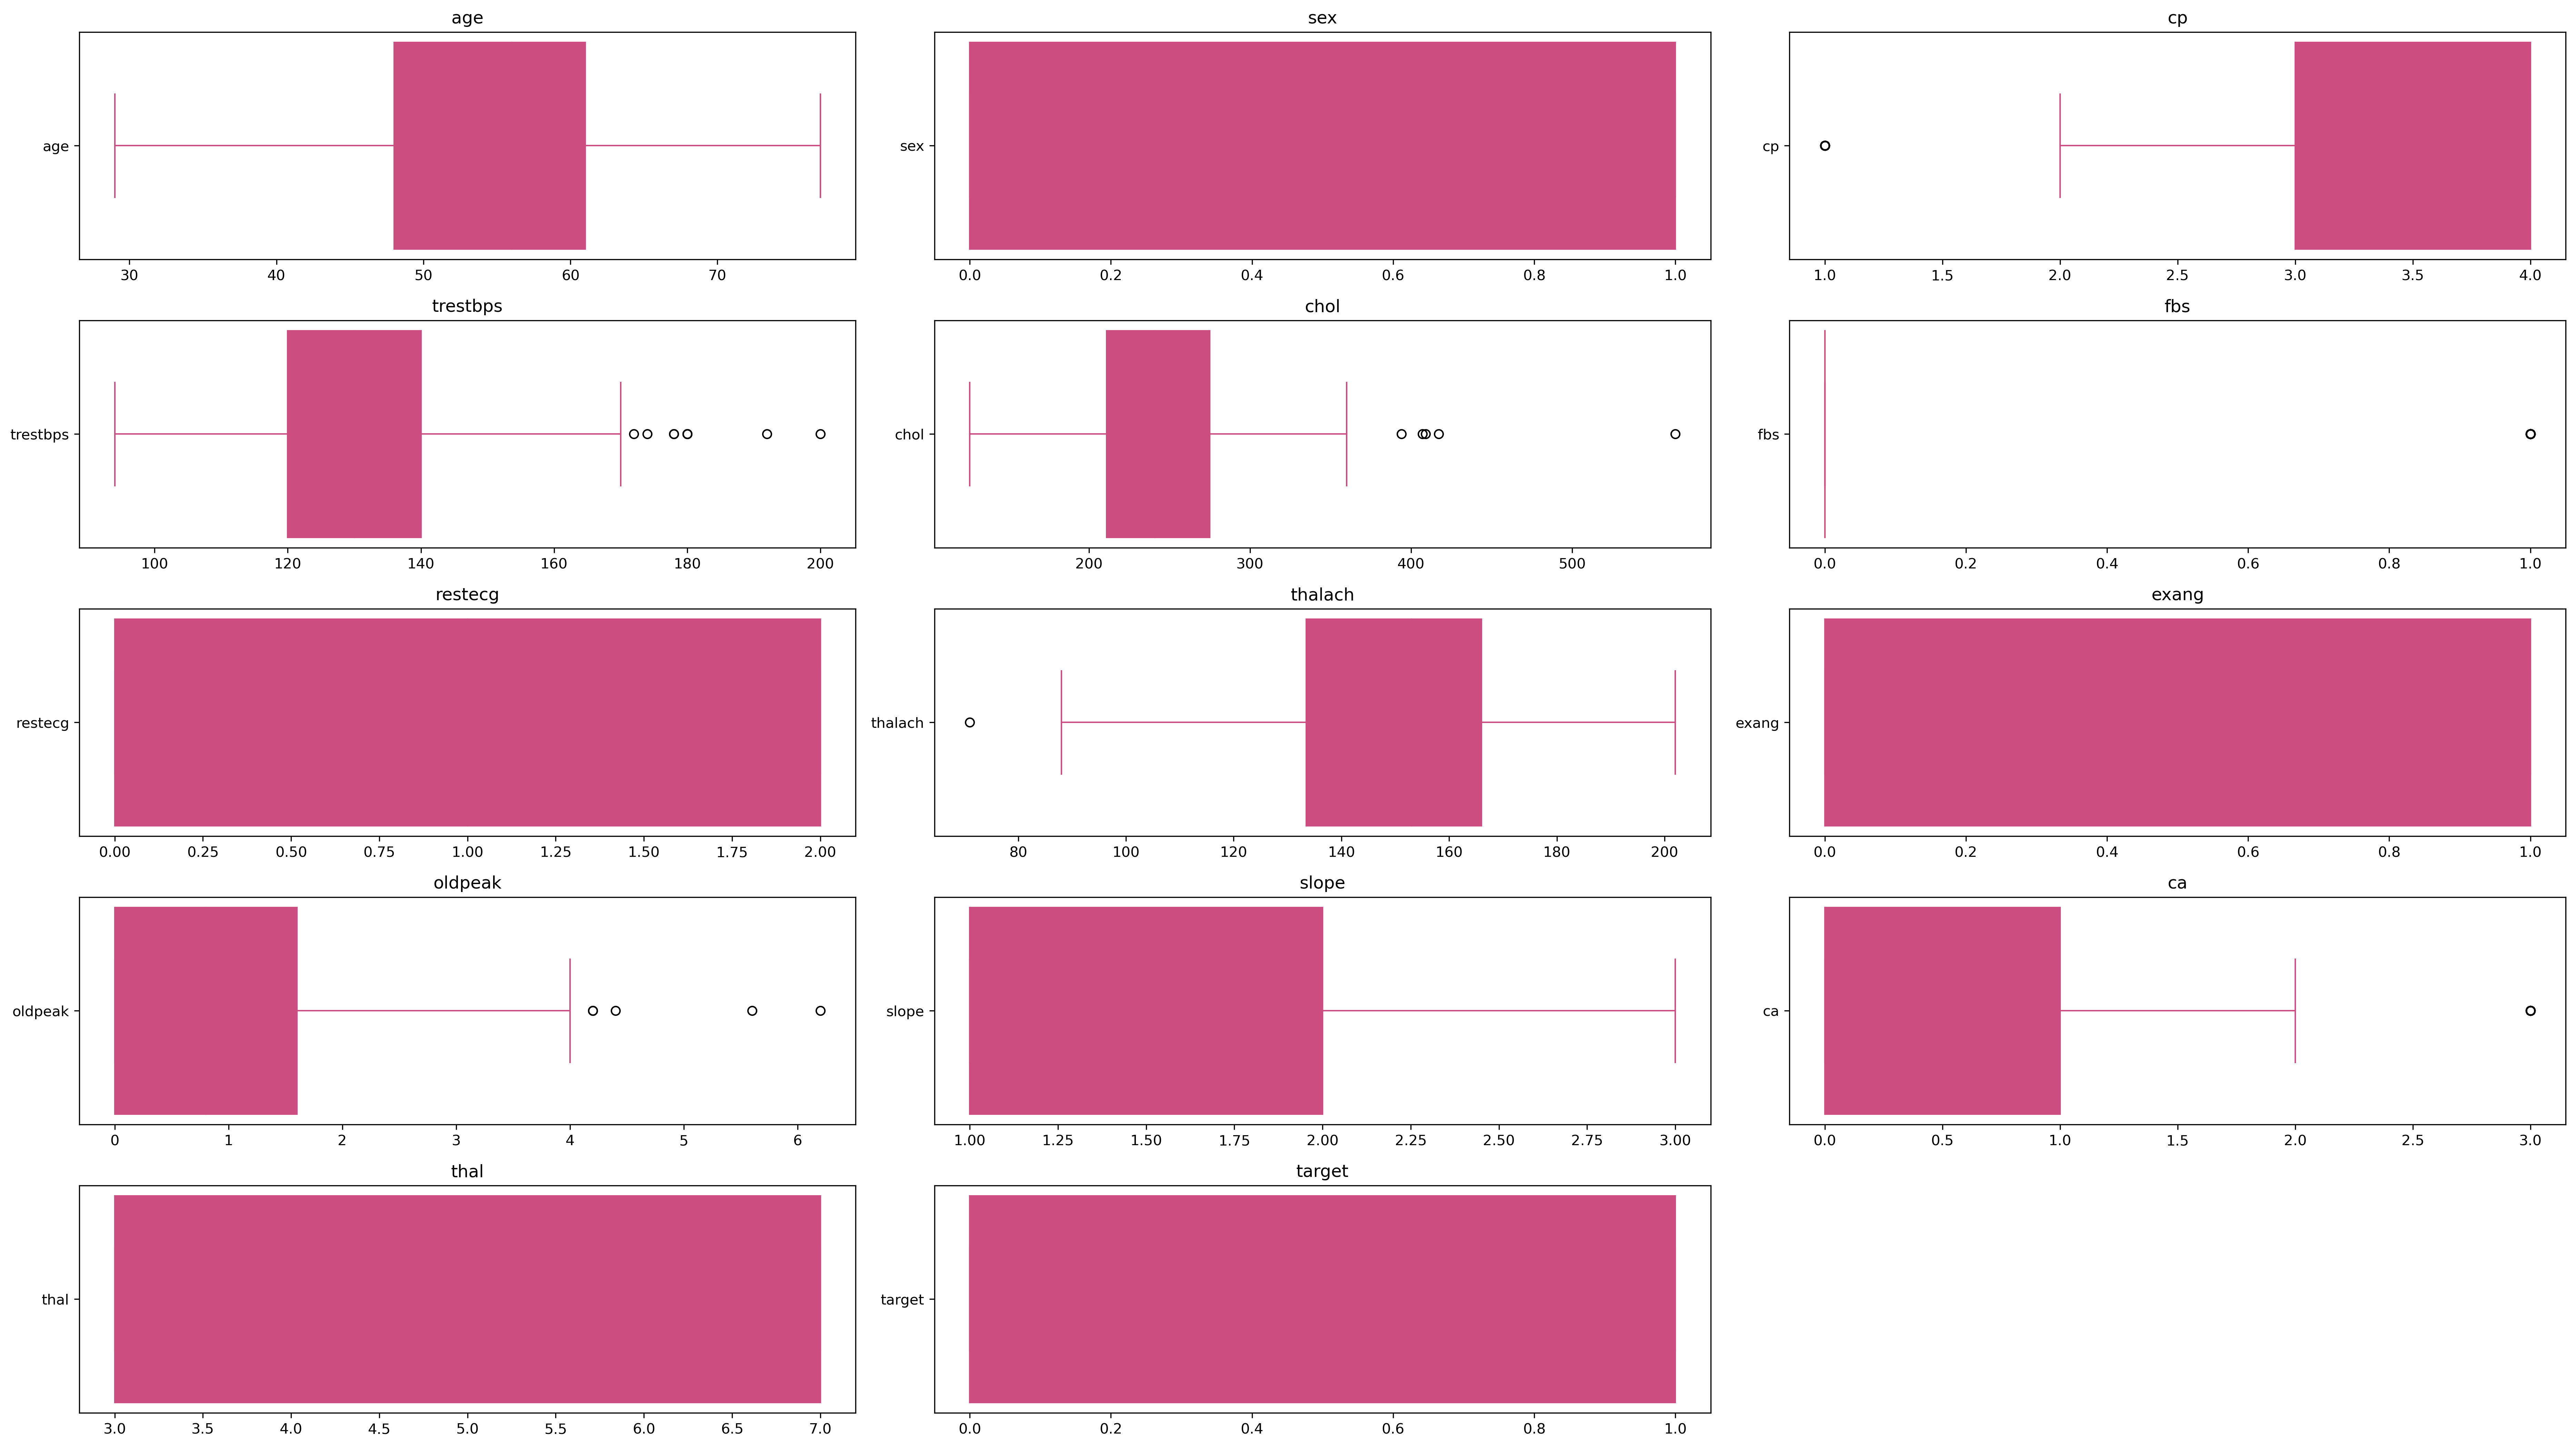

In [13]:
# Filter numerical columns
numerical_columns = data.select_dtypes(include=['float64', 'int64'])

# Set figure size
plt.figure(figsize=(25,25), dpi=300)
#plt.rcParams.update({'font.size': 20})
# Iterate through each column
for i, col in enumerate(numerical_columns.columns):
    plt.subplot(9, 3, i + 1)  # Create subplots
    numerical_columns[col].plot(kind='box', vert=False, showfliers=True, widths=4.0, patch_artist=True,color=(0.8, 0.3, 0.5))  # Plot boxplot for each column
    plt.title(col)  # Set title for each subplot
    plt.subplots_adjust(wspace=0.2)  # Adjust horizontal spacing between subplots
plt.tight_layout()  # Adjust layout
plt.savefig('boxplots_high_res.png', dpi=300, bbox_inches='tight')
plt.show()  # Show the plots


In [14]:
# Define a function to detect outliers using the Interquartile Range (IQR)
def detect_outliers(data):
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    
    # Calculate the IQR
    IQR = Q3 - Q1
    
    # Define outlier bounds
    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)
    
    # Identify outliers
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    return outliers

In [15]:
numerical_columns = data.select_dtypes(include='number').columns
for col in numerical_columns:
    outliers = detect_outliers(data[col])
    outlier_counts = len(outliers)
    print(f"No. of outliers in {col}: {outlier_counts}")

No. of outliers in age: 0
No. of outliers in sex: 0
No. of outliers in cp: 23
No. of outliers in trestbps: 9
No. of outliers in chol: 5
No. of outliers in fbs: 45
No. of outliers in restecg: 0
No. of outliers in thalach: 1
No. of outliers in exang: 0
No. of outliers in oldpeak: 5
No. of outliers in slope: 0
No. of outliers in ca: 20
No. of outliers in thal: 0
No. of outliers in target: 0


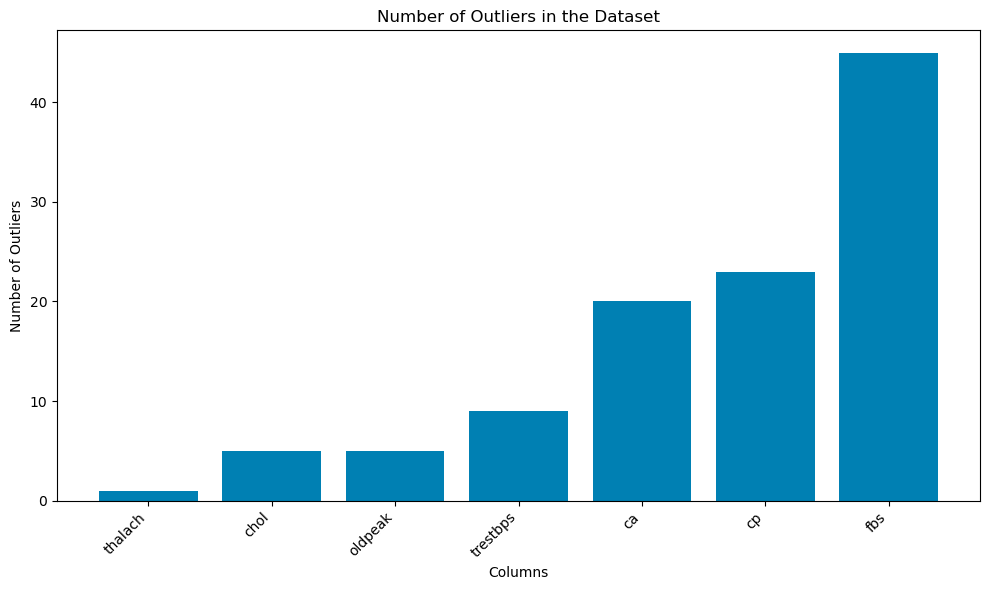

In [16]:
outlier_counts = []
for col in numerical_columns:
    outliers = detect_outliers(data[col])
    outlier_count = len(outliers)
    if outlier_count > 0:
        outlier_counts.append((col, outlier_count))

# Sort the columns based on the number of outliers in ascending order
outlier_counts.sort(key=lambda x: x[1])

# Plotting the bar graph for columns with outliers
plt.figure(figsize=(10, 6))
plt.bar([col[0] for col in outlier_counts], [count[1] for count in outlier_counts], color=(0, 0.5,0.7))
plt.title('Number of Outliers in the Dataset')
plt.xlabel('Columns')
plt.ylabel('Number of Outliers')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

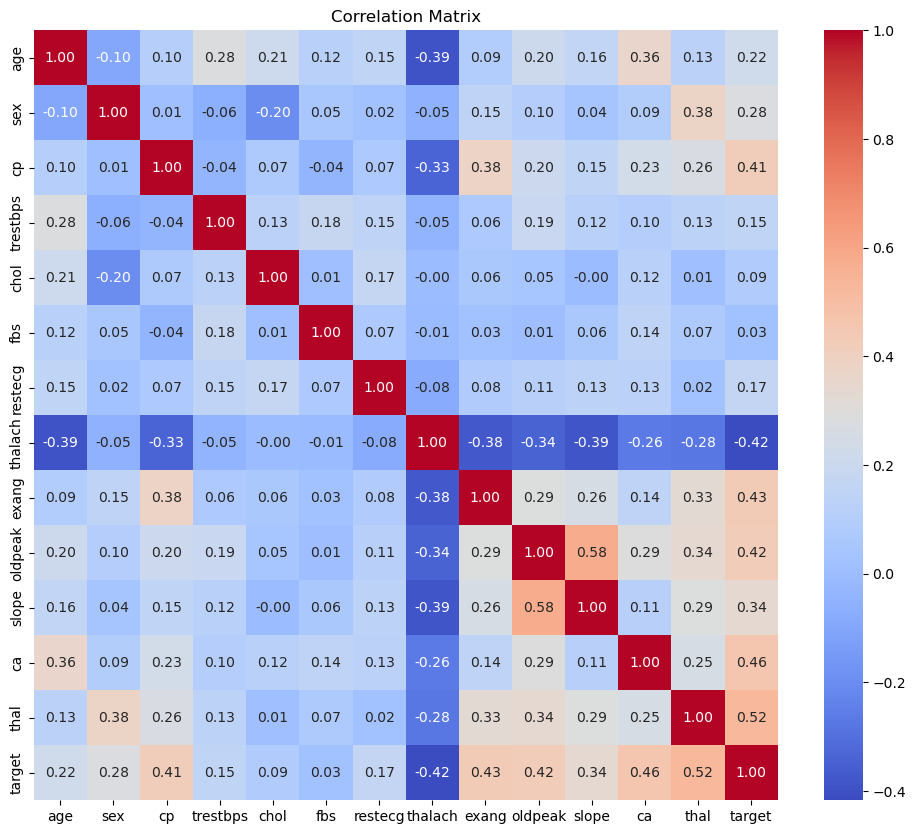

In [17]:
numerical_columns = data.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numerical_columns.corr()
# Visualization using heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

-ve correlation

-ve correlation
thalch and target(-0.42)
thalch and age(-0.39)
thalch and oldpeak(-0.34)


+ve correlation

+ve correlation
oldpeak and slope(0.58)
cp and target(0.41)
exang target(0.43)
ca and target(0.46)
thal and target(0.52)


No strong correlation points. Hence no Multi-collinear points.

In [19]:
# Iteratively replace outliers with column means until no outliers remain
outliers_exist = True
while outliers_exist:
    outliers_exist = False
    for col in numerical_columns:
        outliers = detect_outliers(data[col])
        if not outliers.empty:  # Use .empty to check if the Series is empty
            outliers_exist = True
            mean_value = data[col].mean()  # Get mean value for the current column
            data.loc[data[col].isin(outliers), col] = mean_value  # Replace outliers with mean

In [20]:
# Check if outliers are present after replacement
for col in numerical_columns:
    outliers_after = detect_outliers(data[col])
    outlier_count_after = len(outliers_after)
    print(f"No. of outliers in {col} after replacement: {outlier_count_after}")


No. of outliers in age after replacement: 0
No. of outliers in sex after replacement: 0
No. of outliers in cp after replacement: 0
No. of outliers in trestbps after replacement: 0
No. of outliers in chol after replacement: 0
No. of outliers in fbs after replacement: 0
No. of outliers in restecg after replacement: 0
No. of outliers in thalach after replacement: 0
No. of outliers in exang after replacement: 0
No. of outliers in oldpeak after replacement: 0
No. of outliers in slope after replacement: 0
No. of outliers in ca after replacement: 0
No. of outliers in thal after replacement: 0
No. of outliers in target after replacement: 0


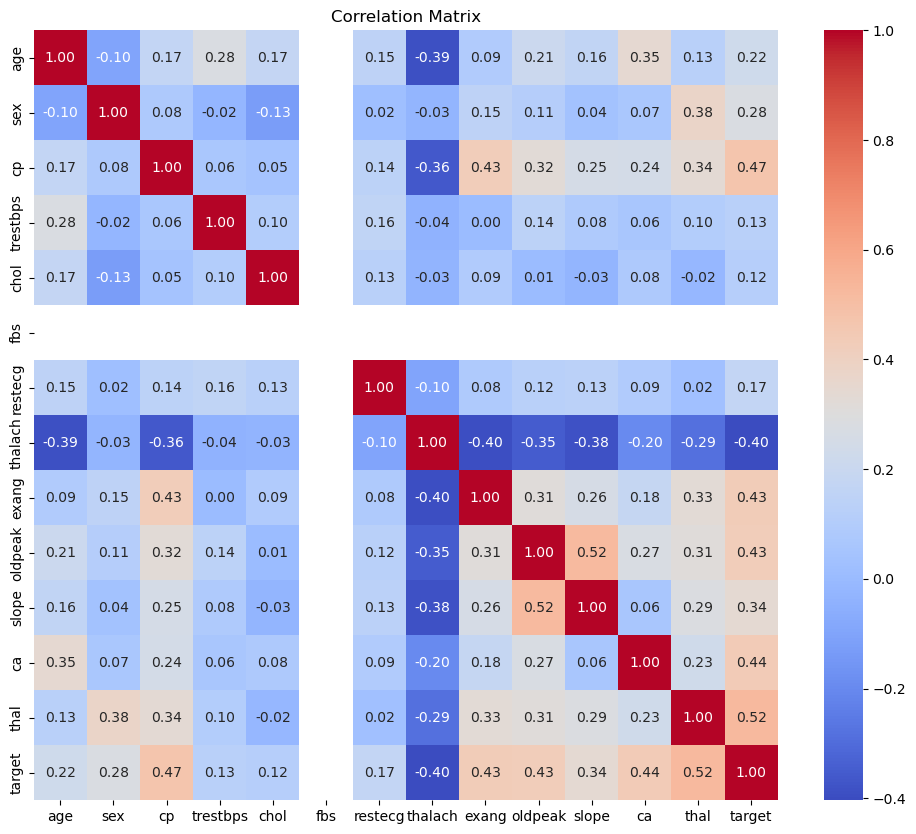

In [21]:
numerical_columns = data.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numerical_columns.corr()
# Visualization using heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

### logistic Regression

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
from sklearn.metrics import classification_report, confusion_matrix

In [25]:
X = data.drop(columns=['target'], axis=1)
y = data["target"]

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [27]:
model = LogisticRegression()


In [28]:
model.fit(X_train, y_train)

C:\Users\kushw\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [29]:
y_pred = model.predict(X_test)

In [30]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Confusion Matrix:
 [[27  2]
 [ 5 27]]


In [31]:
print("classification_report:\n", classification_report(y_test, y_pred))

classification_report:
               precision    recall  f1-score   support

           0       0.84      0.93      0.89        29
           1       0.93      0.84      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.89      0.89        61
weighted avg       0.89      0.89      0.89        61



### Plotting the ROC curve and the AUC values

In [32]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

In [33]:
y_pred_lr = model.predict(X_test)

In [34]:
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_lr)
auc_lr = auc(fpr_lr, tpr_lr)

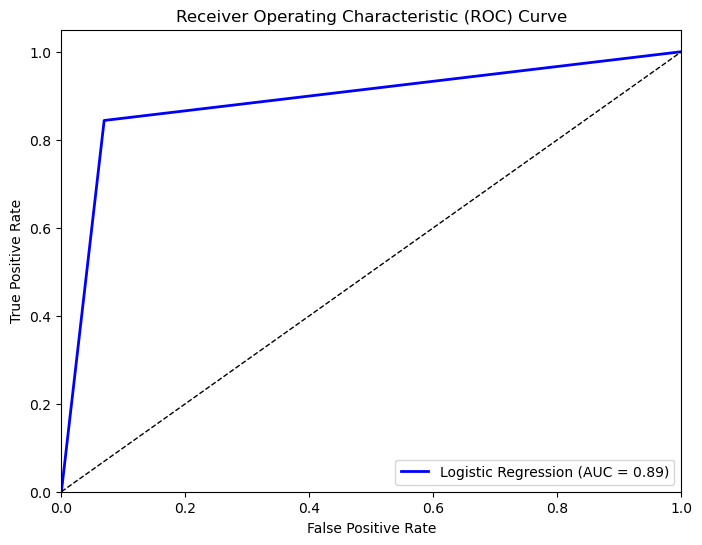

In [35]:
plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, color='blue', lw=2, label='Logistic Regression (AUC = %0.2f)' % auc_lr)
plt.plot([0, 1], [0, 1], color='black', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [36]:
print("AUC for Logistic Regression:", auc_lr)

AUC for Logistic Regression: 0.8873922413793103


### Creating a heatmap for the confussion matrix

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [38]:
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)

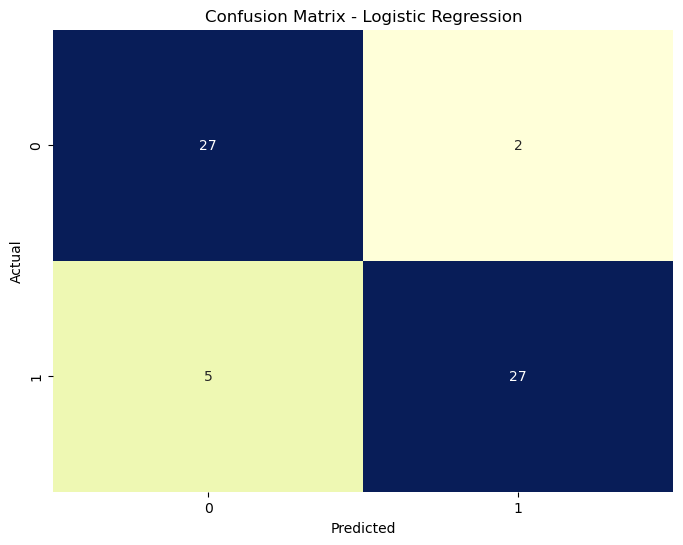

In [39]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_lr, annot=True, cmap="YlGnBu", fmt='g', cbar=False)
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Accuracy = (TP + TN) / (TP + TN + FP + FN)
Precision = TP / (TP + FP)
Recall = TP / (TP + FN)
F1 Score = 2 * (Precision * Recall) / (Precision + Recall)

In [40]:
TP=27
TN=27
FP=2
FN=5

Accuracy = (TP + TN) / (TP + TN + FP + FN)
Precision = TP / (TP + FP)
Recall = TP / (TP + FN)
F1 Score = 2 * (Precision * Recall) / (Precision + Recall)

In [41]:
Accuracy = (TP + TN) / (TP + TN + FP + FN)
Accuracy

0.8852459016393442

In [42]:
Precision = TP / (TP + FP)
Precision

0.9310344827586207

In [43]:
Recall = TP / (TP + FN)
Recall

0.84375

In [44]:
F1_Score = (2 * (Precision * Recall)) / (Precision + Recall)
F1_Score

0.8852459016393444